In [22]:
import matplotlib.pyplot as plt
import random 
from tqdm import tqdm
import numpy as np
import cv2
import os

# Image Process

In [25]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 50
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 3500/3500 [01:00<00:00, 58.17it/s] 


In [26]:
random.shuffle(training_data)

x = []
y = []

for features, labels in training_data:
    x.append(features)
    y.append(labels)
    
X = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(y).reshape(-1, 1)

print('#' * 70, '\n')
print('Nossa matriz X tem tamanho: {}'.format(X.shape), '\n')
print('#' * 70, '\n')
print('Nossa matriz y tem tamanho: {}'.format(Y.shape), '\n')

###################################################################### 

Nossa matriz X tem tamanho: (6985, 50, 50, 1) 

###################################################################### 

Nossa matriz y tem tamanho: (6985, 1) 



# Data Normalization

In [27]:
X = X / 255

# Framework

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization

# CNN Model

In [36]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5, 5), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())  #converter para um vetor coluna

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32, epochs = 10, validation_split = 0.25)

Epoch 1/10
164/164 [==============================] - 222s 1s/step - loss: 0.8342 - accuracy: 0.5708 - val_loss: 1.4912 - val_accuracy: 0.5072
Epoch 2/10
164/164 [==============================] - 231s 1s/step - loss: 0.6721 - accuracy: 0.6081 - val_loss: 0.7058 - val_accuracy: 0.5272
Epoch 3/10
164/164 [==============================] - 224s 1s/step - loss: 0.6391 - accuracy: 0.6376 - val_loss: 0.6836 - val_accuracy: 0.5787
Epoch 4/10
164/164 [==============================] - 220s 1s/step - loss: 0.6024 - accuracy: 0.6758 - val_loss: 0.6511 - val_accuracy: 0.6422
Epoch 5/10
164/164 [==============================] - 216s 1s/step - loss: 0.5728 - accuracy: 0.6993 - val_loss: 0.7521 - val_accuracy: 0.5787
Epoch 6/10
164/164 [==============================] - 215s 1s/step - loss: 0.5455 - accuracy: 0.7186 - val_loss: 0.6070 - val_accuracy: 0.6674
Epoch 7/10
164/164 [==============================] - 231s 1s/step - loss: 0.5169 - accuracy: 0.7425 - val_loss: 0.7462 - val_accuracy: 0.5684

# Evaluate Model

In [37]:
test_loss, test_acc = model.evaluate(X, Y, verbose=2)

219/219 - 53s - loss: 0.4662 - accuracy: 0.7811


In [45]:
print('Erro do modelo: ', test_loss * 100, '%','\nAcurácio do modelo: ', test_acc * 100, '%')

Erro do modelo:  46.61800265312195 % 
Acurácio do modelo:  78.11023592948914 %


# Make Predictions

O algoritmo previu sendo:  [[0.68383366]]
Sendo assim trata-se de um
cachorro. 



<function matplotlib.pyplot.show(*args, **kw)>

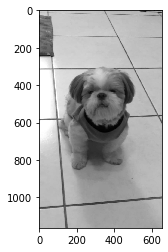

In [55]:
image = cv2.imread('my_image', cv2.IMREAD_GRAYSCALE)    #imagem deve estar na mesma pasta
image = image / 255
my_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
Imagem_final = np.array(my_image).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
my_predicted_image = model.predict(Imagem_final)
print("O algoritmo previu sendo: ", my_predicted_image)
#resultado = np.argmax(my_predicted_image, axis = 1)
print('Sendo assim trata-se de um')
if my_predicted_image <= 0.5:
    print('gato.\n')
else:
    print('cachorro. \n')
plt.imshow(image, cmap = 'gray')
plt.show